
### PROJECT 2
### MARKET SEGMENTATION ANALYSIS
#### JOCELYN JOSEPH MARIYIL

##### Step 1: Deciding (not) to Segment
McDonald’s can take the position that it caters to the entire market and that
there is no need to understand systematic differences across market segments.
Alternatively, McDonald’s can take the position that, despite their market power,
there is value in investigating systematic heterogeneity among consumers and
harvest these differences using a differentiated marketing strategy.

##### Step 2: Specifying the Ideal Target Segment

This step deals with understanding who the ideal target segment is. It can work both ways- positive and negative. McDonalds can decide whether to target those who like McDonalds and visit often and improve their service which is the positive perception. In this case study, they deal with the negative side, to focus on the customer segments which do not like McDonalds, so that they can try increasing their reach and improve customer satisfaction.

##### Step 3: Collecting Data
The data set contains responses from 1453 adult Australian consumers relating to
their perceptions of McDonald’s with respect to the following attributes: YUMMY,
CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE,
HEALTHY, and DISGUSTING. These attributes emerged from a qualitative study conducted in preparation of the survey study. For each of those attributes, respondents
provided either a YES response (indicating that they feel McDonald’s possesses
this attribute), or a NO response (indicating that McDonald’s does not possess this
attribute).
In addition, respondents indicated their AGE and GENDER.

In [59]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("mcdonalds.csv")

##### Step 4: Exploring Data

In [60]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [62]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [63]:
df.shape

(1453, 15)

In [64]:
selected_columns = df.iloc[:, 0:11]  # Select columns 1 to 11 (0-based indexing)

# Convert the selected columns to a NumPy matrix
MD_x = selected_columns.values

In [65]:
MD_x

array([['No', 'Yes', 'No', ..., 'Yes', 'No', 'No'],
       ['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'],
       ['No', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'No'],
       ...,
       ['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'],
       ['Yes', 'Yes', 'No', ..., 'No', 'Yes', 'No'],
       ['No', 'Yes', 'No', ..., 'Yes', 'No', 'Yes']], dtype=object)

In [66]:
MD_x = (MD_x == "Yes").astype(int)

In [67]:
MD_x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

First we extract the first eleven columns from the data set because these columns contain the segmentation variables, and convert the data to a matrix. Then we identify all YES entries in the matrix. This results in a logical matrix with entries TRUE and FALSE. Adding 0 to the logical matrix converts TRUE to 1, and FALSE to 0. We check that we transformed the data correctly by inspecting the average value of each transformed segementation variable.

In [69]:
import numpy as np
column_names=df.columns[0:11].to_list()
df = pd.DataFrame(MD_x, columns=column_names)

# Calculate the column means and round them to two decimal places
column_means = df.mean().round(2)

# Display the column means with column names
print(column_means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


##### The average values of the transformed binary numeric segmentation variables indicate that about half of the respondents (55%) perceive McDonald’s as YUMMY, 91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that McDonald’s food is SPICY.


In [11]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Create a PCA object and fit it to your data
pca = PCA()
pca.fit(MD_x)

# Get a summary of the PCA results
eigenvalues = pca.explained_variance_
variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(variance_ratio)

# Print the summary statistics
print("Eigenvalues:")
print(eigenvalues)
print("\nExplained Variance Ratio:")
print(variance_ratio)
print("\nCumulative Variance Ratio:")
print(cumulative_variance_ratio)


Eigenvalues:
[0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209 0.07035814 0.06192225 0.05612296]

Explained Variance Ratio:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Cumulative Variance Ratio:
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [12]:


# Create a PCA object and fit it to your data
pca = PCA()
pca.fit(MD_x)

# Set the number of digits for printing
num_digits = 1

# Print the PCA explained variance with the specified number of digits
print("Standard deviations (1, .., p=11):\n")
print(np.around(pca.singular_values_, decimals=num_digits))

# Print the proportion of variance explained by each component with the specified number of digits
print("\nProportion of Variance Explained (1, .., p=11):\n")
explained_variance_ratio = np.around(pca.explained_variance_ratio_, decimals=num_digits)
print(explained_variance_ratio)

# Print the cumulative proportion of variance explained with the specified number of digits
print("\nCumulative Proportion of Variance Explained (1, .., p=11):\n")
cumulative_variance_ratio = np.around(np.cumsum(pca.explained_variance_ratio_), decimals=num_digits)
print(cumulative_variance_ratio)


Standard deviations (1, .., p=11):

[28.8 23.1 19.2 15.2 12.9 11.8 11.  10.5 10.1  9.5  9. ]

Proportion of Variance Explained (1, .., p=11):

[0.3 0.2 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]

Cumulative Proportion of Variance Explained (1, .., p=11):

[0.3 0.5 0.6 0.7 0.8 0.8 0.9 0.9 0.9 1.  1. ]


In [13]:

# Get the factor loadings (component loadings)
factor_loadings = pca.components_

# Print the factor loadings
print("Factor Loadings (Component Loadings):\n")
print(factor_loadings)

Factor Loadings (Component Loadings):

[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03616962 -0.08684577
  -0.04044934  0.36045348 -0.06838452 -0.34961569 -0.02679159]
 [ 

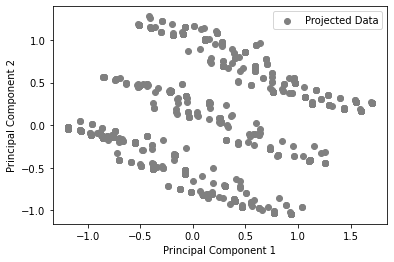

In [14]:
import matplotlib.pyplot as plt

projected_data = pca.transform(MD_x)

plt.scatter(projected_data[:, 0], projected_data[:, 1], c='grey', marker='o', label='Projected Data')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')

plt.show()


##### Step 5: Extracting Segments

Step 5 is where we extract segments. To illustrate a range of extraction techniques,
we subdivide this step into three sections. In the first section, we will use standard
k-means analysis. In the second section, we will use finite mixtures of binary
distributions. In the third section, we will use finite mixtures of regressions.

##### 5.1 Using k-Means

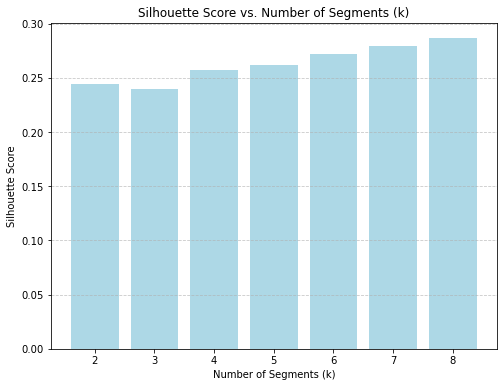

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have MD_x as a NumPy matrix with your data
# MD_x = ...

# Set a random seed for reproducibility
np.random.seed(1234)

# Define a range of values for k (number of clusters)
k_range = range(2, 9)

# Initialize variables to store evaluation scores (e.g., silhouette scores)
evaluation_scores = []

# Perform k-means clustering for each value of k and store the evaluation score
for k in k_range:
    clusterer = KMeans(n_clusters=k, n_init=10, random_state=1234)
    cluster_labels = clusterer.fit_predict(MD_x)
    
    # Calculate the evaluation score (e.g., silhouette score)
    silhouette_avg = silhouette_score(MD_x, cluster_labels)
    evaluation_scores.append(silhouette_avg)

# Create a bar plot to visualize the evaluation scores for different k values
plt.figure(figsize=(8, 6))
plt.bar(k_range, evaluation_scores, color='lightblue', align='center')
plt.xlabel('Number of Segments (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Segments (k)')
plt.xticks(k_range)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


###### 5.2 USING MIXTURES OF DISTRIBUTIONS

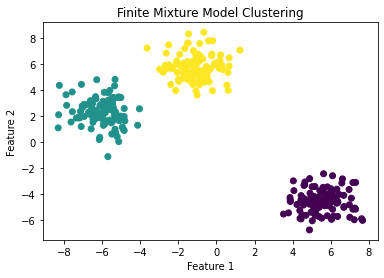

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Generate some sample data (you can replace this with your own data)
n_samples = 300
n_features = 2
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=3, random_state=1234)

# Fit a Gaussian Mixture Model to the data
n_components = 3  # Number of components (clusters)
gmm = GaussianMixture(n_components=n_components, random_state=1234)
gmm.fit(X)

# Predict the cluster labels for each data point
cluster_labels = gmm.predict(X)

# Plot the data points with cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Finite Mixture Model Clustering')
plt.show()


###### 5.3 USING MIXTURES OF REGRESSION MODELS

In [72]:
mcdonalds=pd.read_csv("mcdonalds.csv")
label_mapping = {
    "I hate it!-5": -5,
    "-4": -4,
    "-3": -3,
    "-2": -2,
    "-1": -1,
    "0": 0,
    "+1": 1,
    "+2": 2,
    "+3": 3,
    "+4": 4,
    "I love it!+5": 5
}

# Apply the mapping to create a new 'Like.n' column
mcdonalds['Like_n'] = mcdonalds['Like'].map(label_mapping)

# Display the table of 'Like.n' values
table_like_n = mcdonalds['Like_n'].value_counts().sort_index()
print(table_like_n)

-5    152
-4     71
-3     73
-2     59
-1     58
 0    169
 1    152
 2    187
 3    229
 4    160
 5    143
Name: Like_n, dtype: int64


In [50]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

X = df[['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']]  # Features (independent variables)
y = mcdonalds['Like_n']
y=list(y) # Target (dependent variable)

# Add an intercept (optional)
X = sm.add_constant(X)

# Create a Multiple Regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     216.9
Date:                Tue, 26 Sep 2023   Prob (F-statistic):          4.03e-296
Time:                        18:51:34   Log-Likelihood:                -3003.4
No. Observations:                1453   AIC:                             6031.
Df Residuals:                    1441   BIC:                             6094.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9242      0.280     -6.884      0.0

##### Step 6: Profiling Segments
The core of the segmentation analysis is complete: market segments have been
extracted. Now we need to understand what the four-segment k-means solution
means. The first step in this direction is to create a segment profile plot. The segment
profile plot makes it easy to see key characteristics of each market segment. It also
highlights differences between segments. To ensure the plot is easy to interpret,
similar attributes should be positioned close to one another. We achieve this by
calculating a hierarchical cluster analysis

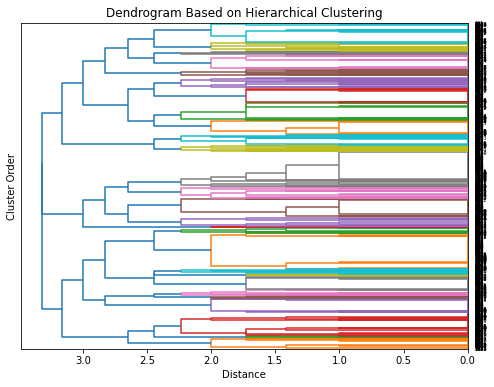

In [54]:
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

distance_matrix = hierarchy.distance.pdist(MD_x)

# Compute hierarchical clustering and obtain the linkage matrix
linkage_matrix = hierarchy.linkage(distance_matrix, method='complete')  # You can choose a different linkage method if needed

# Plot the dendrogram to visualize the clustering
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(linkage_matrix, orientation='left')

# Show the dendrogram plot
plt.xlabel('Distance')
plt.ylabel('Cluster Order')
plt.title('Dendrogram Based on Hierarchical Clustering')
plt.show()

# If you want to retrieve the cluster order as a list, you can do the following
cluster_order = dendrogram['leaves']


In [88]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming you have a DataFrame 'data' with your data
# data = ...

# Specify the number of clusters (K)
n_clusters = 4  # Adjust as needed
X = df[['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']]  # Features (independent variables)
for k in k_range:
    clusterer = KMeans(n_clusters=k, n_init=10, random_state=1234)
    cluster_labels = clusterer.fit_predict(MD_x)
    
    # Calculate the evaluation score (e.g., silhouette score)
    silhouette_avg = silhouette_score(MD_x, cluster_labels)
    evaluation_scores.append(silhouette_avg)

# Create a K-Means clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit the model to your data and get cluster labels
cluster_labels = kmeans.fit_predict(X)

# Add the cluster labels to your original DataFrame
df['Cluster'] = cluster_labels

# Now, 'Cluster' column contains the cluster assignments for each data point


In [104]:
mcdonalds

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like_n
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,-3
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,2
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,1
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,4
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male,-5
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female,2
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female,3
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male,4


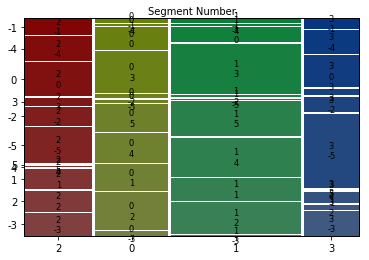

In [105]:
import statsmodels.graphics.mosaicplot as mosaic
df['Like_n'] = mcdonalds['Like_n']
df['Gender']=mcdonalds['Gender']
mosaic.mosaic(df, ['Cluster', 'Like_n'], title='', gap=0.01)
plt.xlabel('Segment Number')
plt.show()

##### Step 8: Selecting (the) Target Segment(s)

In [107]:
df['VisitFrequency']=mcdonalds['VisitFrequency']

In [108]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical variable
df['VisitFrequency'] = label_encoder.fit_transform(df['VisitFrequency'])
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Cluster,Like_n,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,2,-3,0,Female
1,1,1,0,1,1,1,1,1,1,0,0,0,2,0,Female
2,0,1,1,1,1,1,0,1,1,1,0,0,1,0,Female
3,1,1,0,1,1,1,1,1,0,0,1,1,4,4,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,2,3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,3,-5,5,Male
1449,1,1,0,1,0,0,1,1,0,1,0,1,2,4,Female
1450,1,1,0,1,0,1,0,1,1,0,0,0,3,3,Female
1451,1,1,0,0,0,1,1,1,0,1,0,1,4,0,Male


In [109]:
visit_means = df.groupby('Cluster')['VisitFrequency'].mean()

# Print the result
print(visit_means)


Cluster
0    2.547988
1    2.584483
2    2.822368
3    2.654472
Name: VisitFrequency, dtype: float64


In [110]:
like_means = df.groupby('Cluster')['Like_n'].mean()

# Print the result
print(like_means)

Cluster
0    2.139319
1    2.665517
2   -1.513158
3   -2.634146
Name: Like_n, dtype: float64


In [112]:
df['Gender_binary'] = (df['Gender'] == 'Female').astype(int)

# Calculate the proportion of Females by 'k4' clusters
female_proportion = df.groupby('Cluster')['Gender_binary'].mean()

# Print the result
print(female_proportion)

Cluster
0    0.476780
1    0.601724
2    0.588816
3    0.430894
Name: Gender_binary, dtype: float64
